In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [2]:
trainset = np.loadtxt('D:\博士\课程\数据挖掘与分析\kddtrain2021.txt')
testset = np.loadtxt('D:\博士\课程\数据挖掘与分析\kddtest2021.txt')

In [3]:
X = trainset[:,:-1]
y = trainset[:,-1]

In [4]:
print(X.shape)
print(y.shape)

(6270, 100)
(6270,)


## Split dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2021)

In [6]:
print(np.unique(y, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))

(array([0., 1., 2.]), array([1976, 1841, 2453], dtype=int64))
(array([0., 1., 2.]), array([1578, 1456, 1982], dtype=int64))
(array([0., 1., 2.]), array([398, 385, 471], dtype=int64))


## Trainning

### 1、KNN

[[352  16  30]
 [  7 358  20]
 [ 46  77 348]]
0.8437001594896332


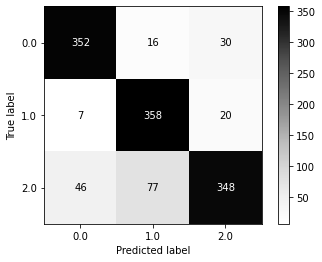

              precision    recall  f1-score   support

         0.0      0.869     0.884     0.877       398
         1.0      0.794     0.930     0.856       385
         2.0      0.874     0.739     0.801       471

    accuracy                          0.844      1254
   macro avg      0.846     0.851     0.845      1254
weighted avg      0.848     0.844     0.842      1254



In [7]:
from sklearn.neighbors  import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_predict = knn_clf.predict(X_val)

print(confusion_matrix(y_val, y_predict))
print(knn_clf.score(X_val, y_val))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_clf, X_val, y_val, cmap=plt.cm.Greys)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_val, y_predict, digits=3))

### 2、Decision Tree

[[383   5  10]
 [  4 370  11]
 [ 11  12 448]]
0.9577352472089314


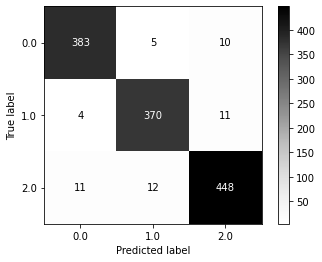

              precision    recall  f1-score   support

         0.0      0.962     0.962     0.962       398
         1.0      0.956     0.961     0.959       385
         2.0      0.955     0.951     0.953       471

    accuracy                          0.958      1254
   macro avg      0.958     0.958     0.958      1254
weighted avg      0.958     0.958     0.958      1254



In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=2021)
dt_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_predict = dt_clf.predict(X_val)

print(confusion_matrix(y_val, y_predict))
print(dt_clf.score(X_val, y_val))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt_clf, X_val, y_val, cmap=plt.cm.Greys)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_val, y_predict, digits=3))

### 3、SVM

[[378  10  10]
 [  1 369  15]
 [ 17  19 435]]
0.9425837320574163


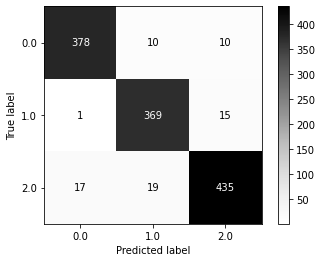

              precision    recall  f1-score   support

         0.0      0.955     0.950     0.952       398
         1.0      0.927     0.958     0.943       385
         2.0      0.946     0.924     0.934       471

    accuracy                          0.943      1254
   macro avg      0.942     0.944     0.943      1254
weighted avg      0.943     0.943     0.943      1254



In [9]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_predict = svm_clf.predict(X_val)

print(confusion_matrix(y_val, y_predict))
print(svm_clf.score(X_val, y_val))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_val, y_val, cmap=plt.cm.Greys)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_val, y_predict, digits=3))

### 4、Ensemble

[[384   6   8]
 [  1 378   6]
 [  9  13 449]]
0.9657097288676236


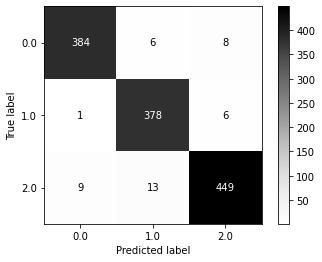

              precision    recall  f1-score   support

         0.0      0.975     0.965     0.970       398
         1.0      0.952     0.982     0.967       385
         2.0      0.970     0.953     0.961       471

    accuracy                          0.966      1254
   macro avg      0.966     0.967     0.966      1254
weighted avg      0.966     0.966     0.966      1254



In [10]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('knn_clf', KNeighborsClassifier()),
    ('dt_clf', DecisionTreeClassifier(random_state=2021)),
    ('svm_clf', SVC(probability=True))],
                              voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_predict = voting_clf.predict(X_val)

print(confusion_matrix(y_val, y_predict))
print(voting_clf.score(X_val, y_val))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(voting_clf, X_val, y_val, cmap=plt.cm.Greys)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_val, y_predict, digits=3))

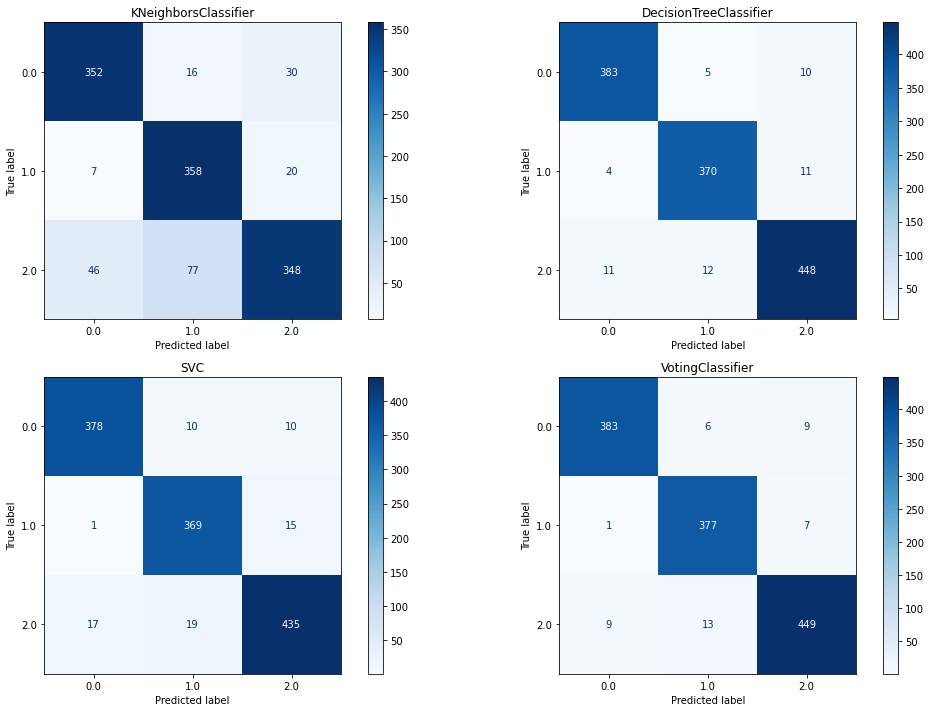

In [11]:
classifiers = [KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=2021),
               SVC(probability=True), 
               VotingClassifier(estimators=[
                                            ('knn_clf', KNeighborsClassifier()),
                                            ('dt_clf', DecisionTreeClassifier(random_state=2021)),
                                            ('svm_clf', SVC(probability=True))],
                                                                      voting='soft')]

for cls in classifiers:
    cls.fit(X_train, y_train)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_val, 
                          y_val, 
                          ax=ax, 
                          cmap=plt.cm.Blues)
    ax.title.set_text(type(cls).__name__)

plt.tight_layout()  
plt.show()

In [12]:
voting_clf.get_params()

{'estimators': [('knn_clf', KNeighborsClassifier()),
  ('dt_clf', DecisionTreeClassifier(random_state=2021)),
  ('svm_clf', SVC(probability=True))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'knn_clf': KNeighborsClassifier(),
 'dt_clf': DecisionTreeClassifier(random_state=2021),
 'svm_clf': SVC(probability=True),
 'knn_clf__algorithm': 'auto',
 'knn_clf__leaf_size': 30,
 'knn_clf__metric': 'minkowski',
 'knn_clf__metric_params': None,
 'knn_clf__n_jobs': None,
 'knn_clf__n_neighbors': 5,
 'knn_clf__p': 2,
 'knn_clf__weights': 'uniform',
 'dt_clf__ccp_alpha': 0.0,
 'dt_clf__class_weight': None,
 'dt_clf__criterion': 'gini',
 'dt_clf__max_depth': None,
 'dt_clf__max_features': None,
 'dt_clf__max_leaf_nodes': None,
 'dt_clf__min_impurity_decrease': 0.0,
 'dt_clf__min_impurity_split': None,
 'dt_clf__min_samples_leaf': 1,
 'dt_clf__min_samples_split': 2,
 'dt_clf__min_weight_fraction_leaf': 0.0,
 'dt_clf__random_state': 2021,
 'd

## Prediction

In [13]:
Submit_y_predict = voting_clf.predict(testset)
print(Submit_y_predict[:10])
print(len(Submit_y_predict))

np.savetxt('D:\博士\课程\数据挖掘与分析\predict.txt', Submit_y_predict, fmt='%d')

[1. 2. 1. 2. 0. 0. 0. 2. 2. 2.]
500
